<a href="https://colab.research.google.com/github/ponvani/Bits/blob/master/Copy_of_Copy_of_Copy_of_Assign1_CIFAR_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network with Dropout using Keras

DL Assignment Group: 70 

Question No.1. Vision Dataset: CIFAR-10- It dataset consists of 60000 32x32 colour images in 10 classes.
    
    Ponvani(2018ac04559)
    Poornima(2018ac045)
    Aparna(2018ac045)

## Import Libraries/Dataset (0.25 mark)

#### a. Import required libraries (recommended- use tensorflow/keras library).

In [5]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Lambda,Dropout,Dense,Flatten,Activation,Conv2D


import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
#tf.set_random_seed(42)  # sets the graph-level random seed

#### b. Import the dataset (use Google Drive if required).

In [7]:
# Use the cifar10 dataset of Keras.

cifar = tf.keras.datasets.cifar10
(Xtrain, Ytrain) , (Xtest, Ytest) = cifar.load_data()

170500096/170498071 [==============================] - 4s 0us/step


#### c. Check the GPU available (recommended- use free GPU provided by Google Colab).

In [23]:
!nvidia-smi

Thu Oct  8 10:35:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    34W / 250W |   1065MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 2. Data Visualization (0.25 mark)

In [25]:
class_names = np.unique(Ytrain)

#### a. Plot at least one sample from each class of the dataset (use matplotlib/seaborn/any other library).

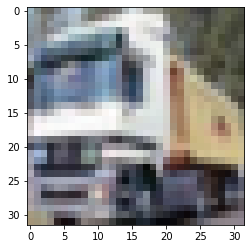

In [8]:
# View first image
import matplotlib.pyplot as plt
plt.imshow(Xtrain[1])
plt.show()

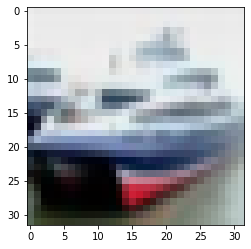

In [9]:
plt.imshow(Xtest[1])
plt.show()

In [ ]:
Ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
Ytest

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

#### b. Print the shapes of train and test data.

In [10]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## 3. Data Pre-processing (0.25 mark)

#### a. Bring the train and test data in the required format.

In [11]:
# Normalize the data
# 50000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((50000,32,32,3))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000,32,32,3))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [12]:

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


## 4. Model Building (0.2*5 = 1 mark)

a. Sequential Model layers- Use AT LEAST 3 dense layers with appropriate input for each. Choose the best number for hidden units and give reasons.
<br> b. Add L2 regularization to all the layers.
<br> c. Add one layer of dropout at the appropriate position and give reasons.
<br> d. Choose the appropriate activation function for all the layers.
<br> e. Print the model summary.

Using Keras, create the DNN or Sequential Model

In [13]:
# Create a Sequential model object
cnnModel = models.Sequential()


Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [14]:
cnnModel.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
cnnModel.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnnModel.add(layers.MaxPooling2D((2, 2)))
cnnModel.add(Dropout(0.2))
cnnModel.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnnModel.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnnModel.add(layers.MaxPooling2D((2, 2)))
cnnModel.add(Dropout(0.2))
cnnModel.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnnModel.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnnModel.add(layers.MaxPooling2D((2, 2)))
cnnModel.add(Dropout(0.2))
cnnModel.add(Flatten())
cnnModel.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnnModel.add(Dropout(0.2))
cnnModel.add(Dense(10, activation='softmax'))

## 5. Model Compilation (0.25 mark)
#### Regularization and Optimizations of DNN

In [15]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
cnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## 6. Model Training (0.5 + 0.5 = 1 mark)

#### a. Train the model for an appropriate number of epochs (print the train and validation accuracy/loss for each epoch). Use the appropriate batch size.

In [16]:
#h = dnnModel.fit( Xtrain, Ytrain, epochs=100, batch_size=64,validation_data=(Xtest, Ytest), verbose=0)

h = cnnModel.fit( Xtrain, Ytrain, epochs=25, validation_split=0.2, batch_size=64)

Epoch 1/25
625/625 [==============================] - 4s 7ms/step - loss: 1.7991 - accuracy: 0.3327 - val_loss: 1.3933 - val_accuracy: 0.4946
Epoch 2/25
625/625 [==============================] - 4s 7ms/step - loss: 1.3168 - accuracy: 0.5265 - val_loss: 1.0475 - val_accuracy: 0.6297
Epoch 3/25
625/625 [==============================] - 4s 7ms/step - loss: 1.0891 - accuracy: 0.6142 - val_loss: 0.9146 - val_accuracy: 0.6756
Epoch 4/25
625/625 [==============================] - 4s 7ms/step - loss: 0.9500 - accuracy: 0.6665 - val_loss: 0.8290 - val_accuracy: 0.7084
Epoch 5/25
625/625 [==============================] - 4s 7ms/step - loss: 0.8547 - accuracy: 0.7014 - val_loss: 0.7651 - val_accuracy: 0.7328
Epoch 6/25
625/625 [==============================] - 4s 7ms/step - loss: 0.7722 - accuracy: 0.7302 - val_loss: 0.7169 - val_accuracy: 0.7503
Epoch 7/25
625/625 [==============================] - 4s 7ms/step - loss: 0.7187 - accuracy: 0.7490 - val_loss: 0.6921 - val_accuracy: 0.7611
Epoch 

#### b. Plot the loss and accuracy history graphs. Print the total time taken for training.

In [17]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 0.3426656126976013
Final training accuracy  0.8781499862670898


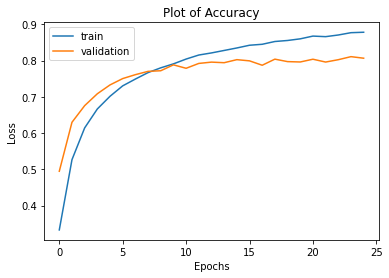

In [18]:
# plot the training  accuracy  
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

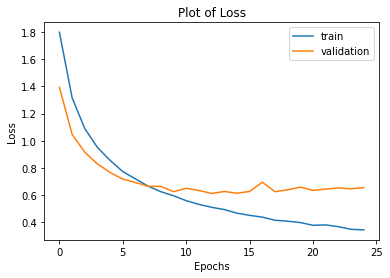

In [19]:
# plot the traininig loss 


plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

## 7. Model Evaluation (0.25 + 0.75 = 1 mark)

In [20]:
# testing the model

testLoss, testAccuracy = cnnModel.evaluate( Xtest, Ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.6667 - accuracy: 0.8009


a. Print the final test/validation loss and accuracy.

In [21]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.666746973991394
Testing accuracy  0.8008999824523926


b. Print confusion matrix and classification report for the validation dataset. Write a summary for the best and worst performing class and the overall trend.

In [29]:
yPred = cnnModel.predict_classes(Xtest)
yPred_probabilities = cnnModel.predict(Xtest)


In [30]:
yPred

array([3, 8, 8, ..., 5, 1, 7])

In [31]:
yPred_probabilities

array([[5.76920102e-05, 1.97112284e-04, 5.49199001e-04, ...,
        5.58892389e-05, 1.80158298e-03, 7.28867017e-05],
       [2.60380602e-05, 4.49570715e-02, 3.66341115e-12, ...,
        5.13391343e-18, 9.54984009e-01, 3.28915303e-05],
       [3.65756191e-02, 3.32714647e-01, 2.79862038e-03, ...,
        3.30785006e-05, 5.82735777e-01, 4.35943268e-02],
       ...,
       [3.33892934e-13, 6.76145121e-13, 7.17925286e-05, ...,
        2.44021362e-06, 2.96599290e-12, 9.34378616e-11],
       [1.71004231e-05, 9.95543540e-01, 3.26449299e-05, ...,
        4.93553557e-07, 7.50381218e-07, 4.34685173e-03],
       [1.74003480e-18, 4.71429820e-21, 1.48813517e-10, ...,
        9.99978304e-01, 4.84203200e-19, 1.04143435e-19]], dtype=float32)

In [40]:
yTest_original=np.argmax(Ytest,axis=1)
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=yTest_original, y_pred=yPred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=yTest_original, y_pred=yPred))

Classification report 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1000
           1       0.92      0.87      0.89      1000
           2       0.69      0.75      0.72      1000
           3       0.66      0.59      0.63      1000
           4       0.76      0.81      0.78      1000
           5       0.75      0.72      0.74      1000
           6       0.84      0.86      0.85      1000
           7       0.83      0.84      0.83      1000
           8       0.89      0.88      0.88      1000
           9       0.81      0.92      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Confusion matrix 
[[780  15  60  12  11   1   8   9  52  52]
 [  6 873   5   3   2   1   5   0  16  89]
 [ 41   2 746  26  75  38  43  19   6   4]
 [ 16   5  77 592  56 138  49  37   9  21]
 [  6   2  40  58 806  14  2